___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6) # Notebboktaki tüm görselleri 10,6 boyutuna getirir.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc = {'figure.figsize':(9, 8)})

In [3]:
df0 = pd.read_csv("final_scout_not_dummy2.csv")
df = df0.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make_model                   15909 non-null  object 
 1   body_type                    15909 non-null  object 
 2   price                        15909 non-null  int64  
 3   km                           15909 non-null  float64
 4   Type                         15909 non-null  object 
 5   Fuel                         15909 non-null  object 
 6   Extras                       15909 non-null  object 
 7   Gears                        15909 non-null  float64
 8   age                          15909 non-null  float64
 9   Previous_Owners              15909 non-null  float64
 10  hp_kW                        15909 non-null  float64
 11  Inspection_new               15909 non-null  int64  
 12  Paint_Type                   15909 non-null  object 
 13  Upholstery_type 

In [5]:
df.shape

(15909, 23)

In [6]:
df.isnull().sum()

make_model                     0
body_type                      0
price                          0
km                             0
Type                           0
Fuel                           0
Extras                         0
Gears                          0
age                            0
Previous_Owners                0
hp_kW                          0
Inspection_new                 0
Paint_Type                     0
Upholstery_type                0
Gearing_Type                   0
Displacement_cc                0
Weight_kg                      0
Drive_chain                    0
cons_comb                      0
CO2_Emission                   0
Comfort_Convenience_Package    0
Entertainment_Media_Package    0
Safety_Security_Package        0
dtype: int64

In [7]:
df.Upholstery_type.value_counts()

Cloth                12231
Part/Full Leather     3678
Name: Upholstery_type, dtype: int64

In [8]:
df.body_type.value_counts()

Sedans           8000
Station wagon    3677
Compact          3239
Van               817
Transporter        88
Off-Road           55
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [9]:
df.Type.value_counts()

Used              11090
New                1649
Pre-registered     1364
Employee's car     1010
Demonstration       796
Name: Type, dtype: int64

In [10]:
df.Fuel.value_counts()

Benzine    8548
Diesel     7297
LPG/CNG      64
Name: Fuel, dtype: int64

In [11]:
df.Extras.value_counts()

Alloy wheels                                                                                                     5782
Alloy wheels, Touch screen                                                                                        697
Roof rack                                                                                                         595
Alloy wheels, Voice Control                                                                                       582
Alloy wheels, Touch screen, Voice Control                                                                         544
                                                                                                                 ... 
Alloy wheels, Catalytic Converter, Shift paddles, Sport package, Sport seats, Sport suspension, Voice Control       1
Alloy wheels, Catalytic Converter, Roof rack, Sport package, Sport seats, Trailer hitch                             1
Alloy wheels, Catalytic Converter, Ski bag, Sport packag

In [12]:
df.Paint_Type.value_counts()

Metallic       15240
Uni/basic        637
Perl effect       32
Name: Paint_Type, dtype: int64

In [13]:
df.Upholstery_type.value_counts()

Cloth                12231
Part/Full Leather     3678
Name: Upholstery_type, dtype: int64

In [14]:
df.Gearing_Type.value_counts()

Manual            8148
Automatic         7296
Semi-automatic     465
Name: Gearing_Type, dtype: int64

In [15]:
df.Drive_chain.value_counts()

front    15701
4WD        204
rear         4
Name: Drive_chain, dtype: int64

In [16]:
df.Comfort_Convenience_Package.value_counts()

Standard        10778
Premium          5043
Premium Plus       88
Name: Comfort_Convenience_Package, dtype: int64

In [17]:
df.Entertainment_Media_Package.value_counts()

Plus        10803
Standard     5106
Name: Entertainment_Media_Package, dtype: int64

In [18]:
df.Safety_Security_Package.value_counts()

Safety Premium Package         14612
Safety Premium Plus Package      798
Safety Standard Package          499
Name: Safety_Security_Package, dtype: int64

## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal. 

In [19]:
def Extras_Classification(x):
    if x is np.nan : return np.nan
    elif 'Steel wheels' in x or 'Voice Control' in x or 'Touch screen' in x : return "Premium"
    else : return "Standard"

In [20]:
df.Extras = df.Extras.apply(Extras_Classification)

In [21]:
df.Extras.value_counts()

Standard    9731
Premium     6178
Name: Extras, dtype: int64

### Converting the Extras feature from object to numeric

In [22]:
df.Extras = df.Extras.map({"Standard": 0, "Premium": 1})
df.Extras

0        1
1        1
2        1
3        1
4        1
        ..
15904    1
15905    1
15906    0
15907    1
15908    1
Name: Extras, Length: 15909, dtype: int64

## multicollinearity control

In [23]:
abs(df.corr()["price"]).sort_values(ascending=False)

price              1.000000
hp_kW              0.696532
Gears              0.530563
age                0.473689
Weight_kg          0.468264
km                 0.399443
CO2_Emission       0.347668
cons_comb          0.301448
Displacement_cc    0.282075
Extras             0.159753
Previous_Owners    0.144672
Inspection_new     0.008508
Name: price, dtype: float64

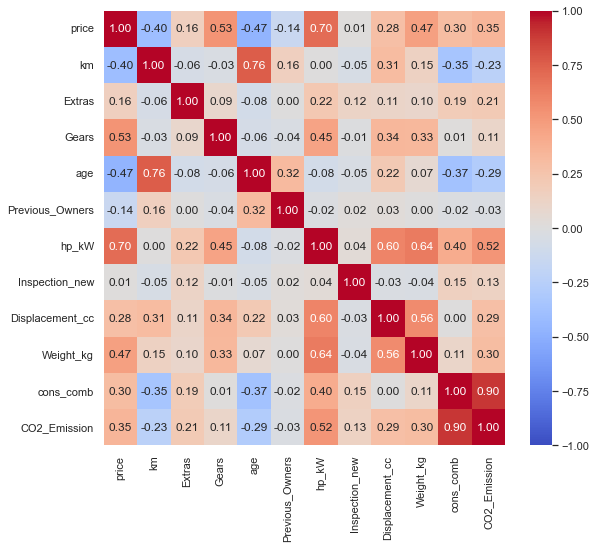

In [24]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmax=1, vmin=-1);

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [25]:
X = df.drop(columns = "price", axis =1)
y = df["price"]

In [26]:
y

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15904    39950
15905    39885
15906    39875
15907    39700
15908    40999
Name: price, Length: 15909, dtype: int64

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make_model                   15909 non-null  object 
 1   body_type                    15909 non-null  object 
 2   km                           15909 non-null  float64
 3   Type                         15909 non-null  object 
 4   Fuel                         15909 non-null  object 
 5   Extras                       15909 non-null  int64  
 6   Gears                        15909 non-null  float64
 7   age                          15909 non-null  float64
 8   Previous_Owners              15909 non-null  float64
 9   hp_kW                        15909 non-null  float64
 10  Inspection_new               15909 non-null  int64  
 11  Paint_Type                   15909 non-null  object 
 12  Upholstery_type              15909 non-null  object 
 13  Gearing_Type    

### Train | Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape

(12727, 22)

In [31]:
X_test.shape

(3182, 22)

## OneHotEncoder

### Example

In [32]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False).set_output(transform="pandas")

# OneHotEncoder converts categorical features into dummies (0 and 1). If we want our model to treat all unique values ​​under the categorical feature equally, 
# we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.
# We could also use the get_dummies() function for this conversion, but since applying get_dummies() to all data and then separating the data into train and test sets will cause data leakege,
# categorical observations for the data we prepared for ML models must be converted into dummies features with the onehotencoder conversion algorithm.
# However, when converting to categorical data, the following should not be forgotten: if there is a hierarchical superiority or ranking (expensive, 
# normal, cheap or Large, average, small, etc.) among unique observations in a categorical feature, the ordinalencoder conversion algorithm should be used. 
# We will talk about this algorithm when it takes place. Conversion of categorical data to dummies featurs is done according to the unique categorical data in the train set where the fit process is performed.
# With the handle_unknown = "ignore" parameter, all categorical data passed in the test set and not in the train set are converted to 0. The default of this parameter is handle_unknown = "error".
# If the handle_unknown parameter remains at its default value, the onehotencoder algorithm will fail for an observation that is in the test set but not in the train set.

In [33]:
train = {"train":['good','bad','worst','good', 'good', 'bad', 'bed']}
test = {"test": ['bad','worst','good', 'good', 'bad', "bed", "resume", "car"]}
train = pd.DataFrame(train)
test = pd.DataFrame(test)
train

,train
0,good
1,bad
2,worst
3,good
4,good
5,bad
6,bed


In [34]:
test

,test
0,bad
1,worst
2,good
3,good
4,bad
5,bed
6,resume
7,car


In [35]:
train

,train
0,good
1,bad
2,worst
3,good
4,good
5,bad
6,bed


In [36]:
enc.fit_transform(train[["train"]])
# Since the fit process is done on the train set, 
# the transformation (transformation) in both the train and the test set will only be made according to the unique observations in the train set.


,train_bad,train_bed,train_good,train_worst
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0


In [37]:
enc.transform(test[["test"]])
# Since the transformation in the test set is made according to the unique observations in the train set, 
# the unique observations in both the train and the test set are converted to 1, while the non-observations (resume, car) are converted to 0.


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- test
Feature names seen at fit time, yet now missing:
- train


In [ ]:
enc.get_feature_names_out(["train"])

In [38]:
pd.DataFrame(enc.fit_transform(train[["train"]]), columns = enc.get_feature_names_out(["train"]))

,train_bad,train_bed,train_good,train_worst
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0


In [39]:
pd.DataFrame(enc.transform(test[["test"]]), columns = enc.get_feature_names_out(["train"]))

# When we name the features, we better see that the value 0 is assigned to the observations that are in the test set but not in the train set.

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- test
Feature names seen at fit time, yet now missing:
- train


### OneHotEncoder object


In [40]:
enco = X_train.select_dtypes("object").columns
enco

Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain',
       'Comfort_Convenience_Package', 'Entertainment_Media_Package',
       'Safety_Security_Package'],
      dtype='object')

In [41]:
enco = list(enco)
enco

['make_model',
 'body_type',
 'Type',
 'Fuel',
 'Paint_Type',
 'Upholstery_type',
 'Gearing_Type',
 'Drive_chain',
 'Comfort_Convenience_Package',
 'Entertainment_Media_Package',
 'Safety_Security_Package']

In [42]:
X_train_enco = ['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
                'Gearing_Type', 'Drive_chain']

In [43]:
X_train_One_Hot_Enco = pd.DataFrame(enc.fit_transform(X_train[X_train_enco]), index = X_train.index,
                           columns = enc.get_feature_names_out(X_train_enco))

In [44]:
X_train_One_Hot_Enco

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,...,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
14291,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
10944,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2582,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14038,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12550,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5390,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
860,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
15795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [45]:
enc.transform(test[["test"]])

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- test
Feature names seen at fit time, yet now missing:
- Drive_chain
- Fuel
- Gearing_Type
- Paint_Type
- Type
- ...


In [46]:
X_test_One_Hot_enco = pd.DataFrame(enc.transform(X_test[X_train_enco]), index = X_test.index,
                           columns = enc.get_feature_names_out(X_train_enco))

In [47]:
X_test_One_Hot_enco

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,...,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
14161,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13430,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6831,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
12255,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1213,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7272,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2879,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12159,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6672,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## OrdinalEncoder

### Example

In [48]:
train2 = {"train":['good','bad','worst','good', 'good', 'bad']}
test2 = {"test": ['bad','worst','good', 'good', 'bad']}
train2 = pd.DataFrame(train2)
test2 = pd.DataFrame(test2)
train2

,train
0,good
1,bad
2,worst
3,good
4,good
5,bad


In [49]:
test2

,test
0,bad
1,worst
2,good
3,good
4,bad


In [50]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['worst','bad','good']

enc_2 = OrdinalEncoder(categories= [categories])

In [51]:
enc_2.fit_transform(train2[["train"]])

array([[2.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.]])

In [52]:
enc_2.transform(test2[["test"]])

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- test
Feature names seen at fit time, yet now missing:
- train


### Ordinal

In [53]:
categories_C = ['Standard','Premium','Premium Plus']
categories_U = ['Cloth','Part/Full Leather']
categories_E = ['Standard','Plus']
categories_S = ['Safety Standard Package','Safety Premium Package','Safety Premium Plus Package']

In [54]:
ordinal_list = ['Upholstery_type','Comfort_Convenience_Package',
                 'Entertainment_Media_Package','Safety_Security_Package']

In [55]:
enc_new = OrdinalEncoder(categories = [categories_U, categories_C, categories_E, categories_S])

In [56]:
enc_new

OrdinalEncoder(categories=[['Cloth', 'Part/Full Leather'],
                           ['Standard', 'Premium', 'Premium Plus'],
                           ['Standard', 'Plus'],
                           ['Safety Standard Package', 'Safety Premium Package',
                            'Safety Premium Plus Package']])

In [57]:
ordinal_X_train = enc_new.fit_transform(X_train[ordinal_list])
ordinal_X_train

array([[0., 0., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 1.],
       [0., 0., 1., 1.]])

In [58]:
ordinal_X_test =  pd.DataFrame(enc_new.transform(X_test[ordinal_list]))
ordinal_X_test

,0,1,2,3
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,2.0
2,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0
...,...,...,...,...
3177,0.0,0.0,1.0,1.0
3178,0.0,0.0,1.0,1.0
3179,0.0,1.0,1.0,1.0
3180,0.0,1.0,1.0,1.0


In [59]:
ordinal_X_train = pd.DataFrame(ordinal_X_train)

In [60]:
ordinal_X_train.sort_index()

,0,1,2,3
0,0.0,0.0,1.0,1.0
1,0.0,1.0,1.0,1.0
2,0.0,0.0,1.0,1.0
3,0.0,0.0,1.0,1.0
4,1.0,0.0,1.0,1.0
...,...,...,...,...
12722,1.0,0.0,0.0,1.0
12723,0.0,0.0,1.0,1.0
12724,0.0,0.0,0.0,1.0
12725,0.0,1.0,0.0,1.0


In [61]:
X_train_One_Hot_Enco.sort_index()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,...,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
15903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
15905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
15907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [62]:
type(X_train_One_Hot_Enco)

pandas.core.frame.DataFrame

In [63]:
type(ordinal_X_train)

pandas.core.frame.DataFrame

In [64]:
X_train_new = pd.concat([X_train_One_Hot_Enco, ordinal_X_train], axis=1, ignore_index=False, sort=True)

In [65]:
X_train_new = X_train_One_Hot_Enco.join(ordinal_X_train)

In [66]:
X_train_new.sort_index()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,...,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,0,1,2,3
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
15903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
15905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
15907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN


In [67]:
X_test_new = X_test_One_Hot_enco.join(ordinal_X_test )

In [68]:
X_test_new

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,...,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear,0,1,2,3
14161,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
13430,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
6831,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
12255,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
1213,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7272,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
2879,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
12159,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
6672,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN


### Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder 

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler().set_output(transform="pandas")

In [ ]:
scaler.fit(X_train) 

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [ ]:
# Pre-defined functions

def train_val(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided. 

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2 

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features 

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


## Cross Validate

## Prediction Error

## Residual Plot

## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

## Pipeline
- Read the documentation and apply pipeline 
- link : https://scikit-learn.org/stable/modules/compose.html

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True  
- ***Fit the model (use pipeline)***
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Ridge

## Cross Validation

## Finding best alpha for Ridge

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- ***Fit the model (use pipeline)*** 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## Cross Validation

## Finding best alpha for Lasso

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- ***Fit the model (use pipeline)*** 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 
- Compare different evaluation metrics

## Cross Validation

## Finding best alpha and l1_ratio for ElasticNet

## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model 

## Cross Validate

## 7. Visually Compare Models Performance In a Graph

## Prediction a new observation
- Create an observation and predict its price

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___